# Viral Tweets

## Introduction

This project analyzes real tweets to find patterns in the way people use social media and determine what features of a tweet are most important in determining its virality. The goal of this project is to use a K-Nearest Neighbor algorithm to predict whether or not a tweet will go viral.

#### Data sources:

The json file analyzed was provided by Codecademy.

## Scoping

Investigate Data
    
Data Wrangling
- Describe the characteristics of the data
- Defining Viral Tweets
- Making new features
        
Feature Selection
        
Model Implementation and Evaluation
- K-Nearest Neighbor Classifier
        
Conclusion and Recommendations

## Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from functools import partial
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Load and Inspect Data

The `random_tweets.json` file, loaded into `all_tweets`, contain different features about tweets such as user information, location, tweets' texts, the time tweet was created, favorite count, etc. Some of these features are dictionaries that contain more information. There are 11,099 rows and 31 columns in `all_tweets`. 16 out of 31 have missing values.

In [2]:
all_tweets = pd.read_json('random_tweets.json', lines=True)

In [3]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

In [4]:
all_tweets.head(2)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,extended_entities,quoted_status,withheld_in_countries
0,2018-07-31 13:34:40+00:00,1024287229525598210,1024287229525598208,RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…,False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'KWWLStormTrack7', 'name': 'KWWL Storm Track 7', 'id': 131864835, 'id_str': '131864835', 'indices': [3, 19]}], 'urls': []}","{'iso_language_code': 'en', 'result_type': 'recent'}","<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NaN,NaN,NaN,NaN,None,"{'id': 145388018, 'id_str': '145388018', 'name': 'Derek Wolkenhauer', 'screen_name': 'derekw221', 'location': 'Waterloo, Iowa', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 215, 'friends_count': 335, 'listed_count': 2, 'created_at': 'Tue May 18 21:30:10 +0000 2010', 'favourites_count': 3419, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': False, 'statuses_count': 4475, 'lang': 'en', 'contributors_ena...",None,None,None,NaN,"{'created_at': 'Mon Jul 30 16:49:41 +0000 2018', 'id': 1023973918959382528, 'id_str': '1023973918959382528', 'text': 'We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on Jul… https://t.co/fEfTJIfrA7', 'truncated': True, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/fEfTJIfrA7', 'expanded_url': 'https://twitter.com/i/web/status/1023973918959382528', 'display_url': 'twitter.com/i/web/s...",False,3,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-31 13:34:40+00:00,1024287229512953856,1024287229512953856,@hail_ee23 Thanks love its just the feeling of eyes that get me so nervous ❤️,False,"{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'hail_ee23', 'name': 'Jordan Vaughn', 'id': 927185727053553665, 'id_str': '927185727053553665', 'indices': [0, 10]}], 'urls': []}","{'iso_language_code': 'en', 'result_type': 'recent'}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1.024128e+18,1.024128e+18,9.271857e+17,9.271857e+17,hail_ee23,"{'id': 2407992339, 'id_str': '2407992339', 'name': 'indecent exposure', 'screen_name': 'alyssamajor9', 'location': 'Sherbrooke, Québec', 'description': 'Iifes a journey enjoy it❤️', 'url': 'https://t.co/Q7UGSdRBOO', 'entities': {'url': {'urls': [{'url': 'https://t.co/Q7UGSdRBOO', 'expanded_url': 'https://www.instagram.com/alyssa.major/', 'display_url': 'instagram.com/alyssa.major/', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 199, 'friends_coun...",None,None,"{'id': '26b41b13d49ea2bf', 'url': 'https://api.twitter.com/1.1/geo/id/26b41b13d49ea2bf.json', 'place_type': 'city', 'name': 'Sherbrooke', 'full_name': 'Sherbrooke, Québec', 'country_code': 'CA', 'country': 'Canada', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-72.10789, 45.300919], [-71.803175, 45.300919], [-71.803175, 45.524339], [-72.10789, 45.524339]]]}, 'attributes': {}}",NaN,NaN,False,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
all_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 11099 non-null  datetime64[ns, UTC]
 1   id                         11099 non-null  int64              
 2   id_str                     11099 non-null  int64              
 3   text                       11099 non-null  object             
 4   truncated                  11099 non-null  bool               
 5   entities                   11099 non-null  object             
 6   metadata                   11099 non-null  object             
 7   source                     11099 non-null  object             
 8   in_reply_to_status_id      1402 non-null   float64            
 9   in_reply_to_status_id_str  1402 non-null   float64            
 10  in_reply_to_user_id        1503 non-null   float64            
 11  in

In [6]:
all_tweets.loc[0]['user']

{'id': 145388018,
 'id_str': '145388018',
 'name': 'Derek Wolkenhauer',
 'screen_name': 'derekw221',
 'location': 'Waterloo, Iowa',
 'description': '',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 215,
 'friends_count': 335,
 'listed_count': 2,
 'created_at': 'Tue May 18 21:30:10 +0000 2010',
 'favourites_count': 3419,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 4475,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '022330',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme15/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme15/bg.png',
 'profile_background_tile': False,
 'profile_image_url': 'http://pbs.twimg.com/profile_images/995790590276243456/cgxRVviN_normal.jpg',
 'profile_image_url_https': 'https://pbs.twimg.com/profile

<br>

## Data Wrangling


### Data Characteristics:

#### Label 

**is_viral**: whether a tweet is viral or not. Created from `retweet_count` column, using the median 13 as the benchmark. If the retweet count is greater than 13, then tweet is viral.

#### Features

**favorite_count**: number of users who liked/favorited the tweet.

**tweet_length**: number of words in tweet.

**followers_count**: number of followers of the user who tweeted. Extracted from `user` dictionary.

**hashtag_count**: number of hashtags in a tweet.

### Defining Viral Tweets:

So how do we define a viral tweet? A good place to start is to look at the number of retweets the tweet has. 

#### Class Balnce Check

All good here! counts in each category are about the same.

In [7]:
median_retweet_count = all_tweets['retweet_count'].median()
median_retweet_count

13.0

In [8]:
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > median_retweet_count, 1, 0)
all_tweets['is_viral'].head()

0    0
1    0
2    0
3    1
4    0
Name: is_viral, dtype: int64

In [9]:
#Class Balance

all_tweets['is_viral'].value_counts()

0    5562
1    5537
Name: is_viral, dtype: int64

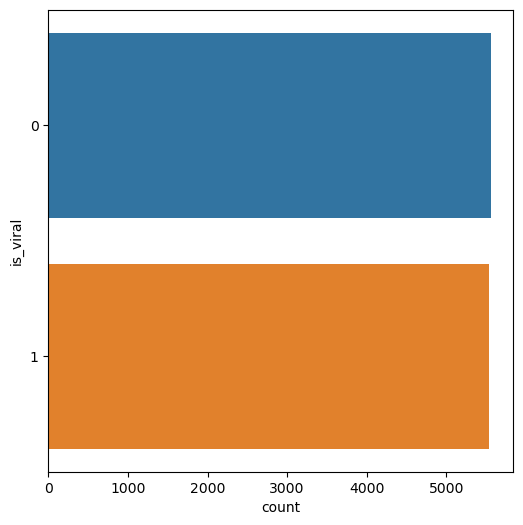

In [10]:
sns.countplot(data=all_tweets, y="is_viral");

In [11]:
labels = all_tweets['is_viral']

### Making New Features

In [12]:
#tweet length

all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis = 1)
all_tweets['tweet_length'].head()

0    140
1     77
2    140
3    140
4    140
Name: tweet_length, dtype: int64

In [13]:
#followers' count from user dict

all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis = 1)
print(all_tweets['followers_count'].head())

0     215
1     199
2     196
3    3313
4     125
Name: followers_count, dtype: int64


In [14]:
all_tweets['hashtag_count'] = all_tweets.apply(lambda tweet: tweet['text'].count('#'), axis = 1)
all_tweets['hashtag_count'].head()

0    0
1    0
2    0
3    0
4    0
Name: hashtag_count, dtype: int64

In [15]:
#Independent features for modeling

tweet_features = all_tweets[['favorite_count', 'tweet_length', 'followers_count', 'hashtag_count']]
tweet_features.head()

,favorite_count,tweet_length,followers_count,hashtag_count
0,0,140,215,0
1,0,77,199,0
2,0,140,196,0
3,0,140,3313,0
4,0,140,125,0


In [16]:
tweet_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   favorite_count   11099 non-null  int64
 1   tweet_length     11099 non-null  int64
 2   followers_count  11099 non-null  int64
 3   hashtag_count    11099 non-null  int64
dtypes: int64(4)
memory usage: 347.0 KB


<br>

## Feature Selection

All four features are selected for modeling!

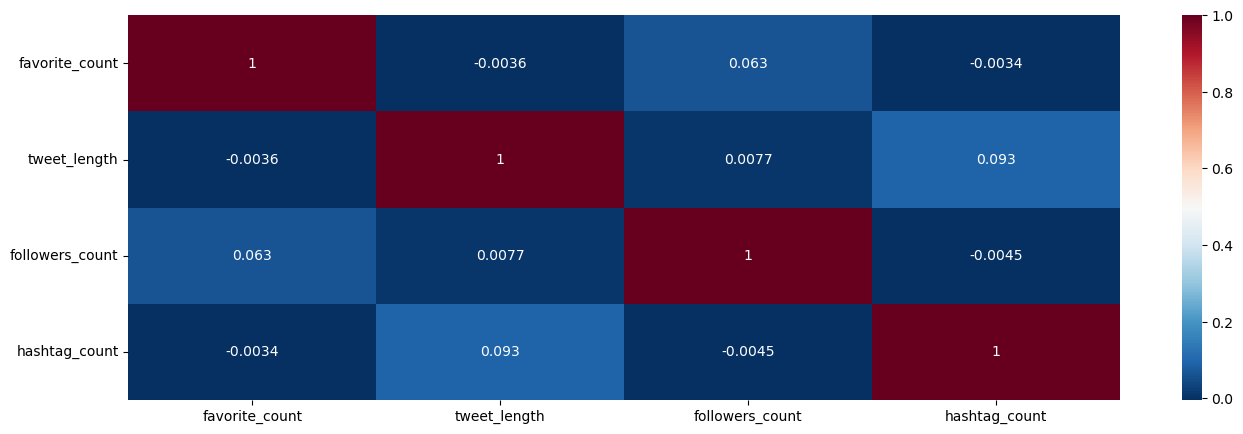

<Figure size 600x600 with 0 Axes>

In [17]:
corr_matrix = tweet_features.corr(method='pearson')
plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()
plt.clf()

In [18]:
mutual_info_classif(tweet_features, labels, random_state=1)

array([0.01894605, 0.04198595, 0.01408666, 0.00530526])

In [19]:
score_func = partial(mutual_info_classif, random_state=1)
selection = SelectKBest(score_func=score_func, k=4)
selection.fit_transform(tweet_features, labels)

array([[   0,  140,  215,    0],
       [   0,   77,  199,    0],
       [   0,  140,  196,    0],
       ...,
       [   0,  140,  135,    0],
       [   0,  140,   59,    0],
       [   0,   75, 1563,    0]])

In [20]:
tweet_features = tweet_features[tweet_features.columns[selection.get_support(indices=True)]]
tweet_features

,favorite_count,tweet_length,followers_count,hashtag_count
0,0,140,215,0
1,0,77,199,0
2,0,140,196,0
3,0,140,3313,0
4,0,140,125,0
...,...,...,...,...
11094,0,140,509,0
11095,0,75,462,0
11096,0,140,135,0
11097,0,140,59,0


<br>

## Model Implementation & Evaluation

The KNN `classifier`'s accuracy is ~0.71 (Train) & ~0.62 (Test) with a specified k value of 7.

After looping through a range of k values, `k=7` seem to be one of our best options.

#### Split the Data into Training and Testing Sets

In [21]:
train_data, test_data, train_labels, test_labels = train_test_split(tweet_features, labels, test_size = 0.2, random_state = 42)

#### Standardize Data

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit and transform data
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

#### Create and Train a KNN classifier

In [23]:
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(train_data, train_labels)

KNeighborsClassifier(n_neighbors=7)

In [24]:
print('Train Score:')
np.round(classifier.score(train_data, train_labels), 2)

Train Score:


0.71

In [25]:
print('Test Score:')
np.round(classifier.score(test_data, test_labels), 2)

Test Score:


0.62

#### Choosing K

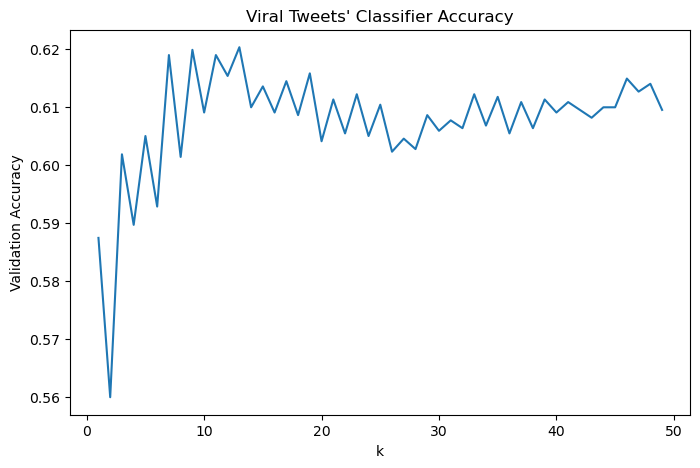

<Figure size 600x600 with 0 Axes>

In [26]:
scores = []
for k in range(1, 50):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
    
plt.figure(figsize = (8,5))
plt.plot(range(1,50), scores)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Viral Tweets\' Classifier Accuracy')
plt.show()
plt.clf()

In [27]:
prediction = classifier.predict(train_data)
print(classification_report(train_labels, prediction))

              precision    recall  f1-score   support

           0       0.68      0.54      0.60      4479
           1       0.61      0.74      0.67      4400

    accuracy                           0.64      8879
   macro avg       0.65      0.64      0.64      8879
weighted avg       0.65      0.64      0.64      8879



## Conclusion & Recommendation

By using the features `favorite_count`, `tweet_length`, `followers_count`, and `hashtag_count`, we were able to get up to around 71% accuracy. To improve the model's accuracy, we can include some of the other features provided in this dataset or explore new relevant features. 